In [1]:
import torch

# Tensor Data Type

In pytorch tensor is represented by `tensor` data typee. On the surface this class is pretty similar to numpy array. with `tensor` class we can build a scalar, vector, matrix, and tensor (just like numpy array)

## Scalar

In [2]:
scalar = torch.tensor(10)

In [3]:
scalar.ndim

0

In [4]:
scalar.item() # Item function can only be used to conver a tensor into scalar, so vector, matrix, and tensor cannnot be converted with item

10

## Vector and Matrix

In [7]:
VECTOR = torch.tensor([1,2,3,4])
VECTOR

tensor([1, 2, 3, 4])

In [8]:
VECTOR.ndim

1

In [11]:
VECTOR[1:] # Slicing posible

tensor([2, 3, 4])

In [13]:
MATRIX = torch.tensor([
    [1,2,3,4],
    [5,6,7,8],
    [9,10,11,12],
    [13,14,15,16]
])
MATRIX

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16]])

In [23]:
MATRIX.shape

torch.Size([4, 4])

In [22]:
MATRIX[1:3,1:3]

tensor([[ 6,  7],
        [10, 11]])

## Tensor

When working with tensor, the way I visualize it is thinking that as an array of matrix (this only work with 3 dimensional tensor). Starting from there, we can start to visualize what the next dimensional will be. array of array of array and so on. This representation will make sense depending on the data. For example a batch of digital images ca be represented by 4 dimensional tensor, because each image have 3 matrix (RGB), now if we have another data that require 4 matrix the batch will be represented using 5 dimensional tensor

In [24]:
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]]) # A 3 dimensional tensor with only one matrix
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [25]:
TENSOR.ndim

3

In [26]:

TENSOR.shape

torch.Size([1, 3, 3])

Beside this basic representation, `tensor` data type also have bunch of operation, much like numpy array. There are matrix multiplication, addition, etc. (https://pytorch.org/docs/stable/torch.html)

# Linear Function
$$y = x \cdot A^T + B$$

The linear function above is the fundamental of NN. In torch we can use this function readily by calling Linear module from nn

In [32]:
x = torch.tensor([
    [1,2],
    [3,4],
    [5,6]
], dtype=torch.float64) # The in put is 2 by 3 matrix

linear_function = torch.nn.Linear(in_features=2, # Number of input (in our case is two because we have a 2x3 Matrix)
                                  out_features=6, # The number of output, in NN model this will be the size of the next layer. (in our case we will be using 6 so the output will be 6x3 matrix)
                                  bias=True,dtype=torch.float64) # When using this module the number inside A and B will be randomized

output = linear_function(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[ 0.7165, -0.0129,  1.3757,  0.0508, -0.0167, -1.2642],
        [ 1.0733,  0.1539,  2.0264, -0.3446,  0.4805, -2.6776],
        [ 1.4301,  0.3206,  2.6771, -0.7400,  0.9776, -4.0910]],
       dtype=torch.float64, grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


In [41]:
linear_function(x.unsqueeze(dim=0))

tensor([[[ 0.7165, -0.0129,  1.3757,  0.0508, -0.0167, -1.2642],
         [ 1.0733,  0.1539,  2.0264, -0.3446,  0.4805, -2.6776],
         [ 1.4301,  0.3206,  2.6771, -0.7400,  0.9776, -4.0910]]],
       dtype=torch.float64, grad_fn=<ViewBackward0>)

## Creating Simple Linear Rergression Using PyTorch

Utilizing the Linear class we can create a simple linear regresion using pytorch (singgle layen ANN with one output node with linear activation function)

## Create dummy data set

In [43]:
# Create weight and bias
weight = 0.5
bias = 0.1

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias 

# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [44]:
import matplotlib.pyplot as plt

def plot_predictions(train_data, 
                     train_labels, 
                     test_data, 
                     test_labels, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

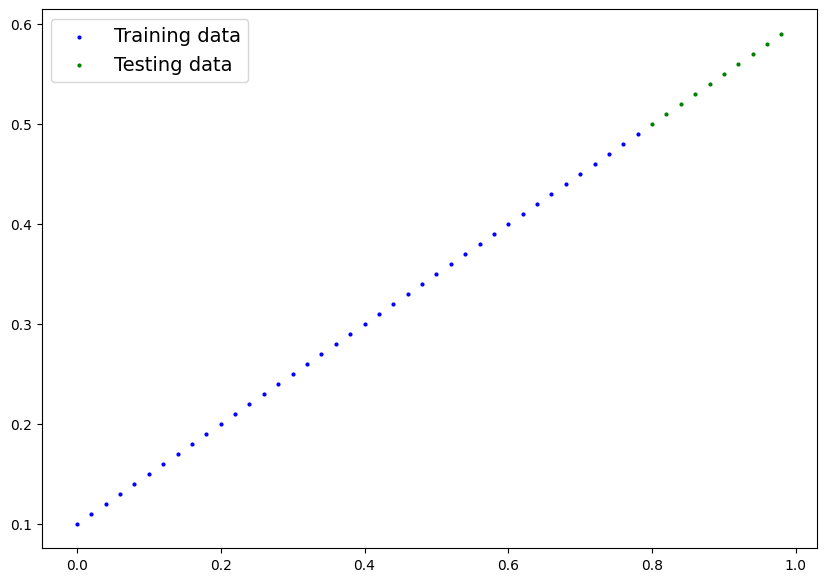

In [45]:
plot_predictions(X_train,y_train,X_test,y_test)

## Creating The Model

In [49]:
class SimpleLinearRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = torch.nn.Linear(in_features=1,out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [50]:
torch.manual_seed(100)
linear_model = SimpleLinearRegression()
linear_model.state_dict() # Randomly assigne weight and bias

OrderedDict([('linear_layer.weight', tensor([[-0.7767]])),
             ('linear_layer.bias', tensor([0.6317]))])

## Making Initial Prediction

In [51]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = linear_model(X_test)


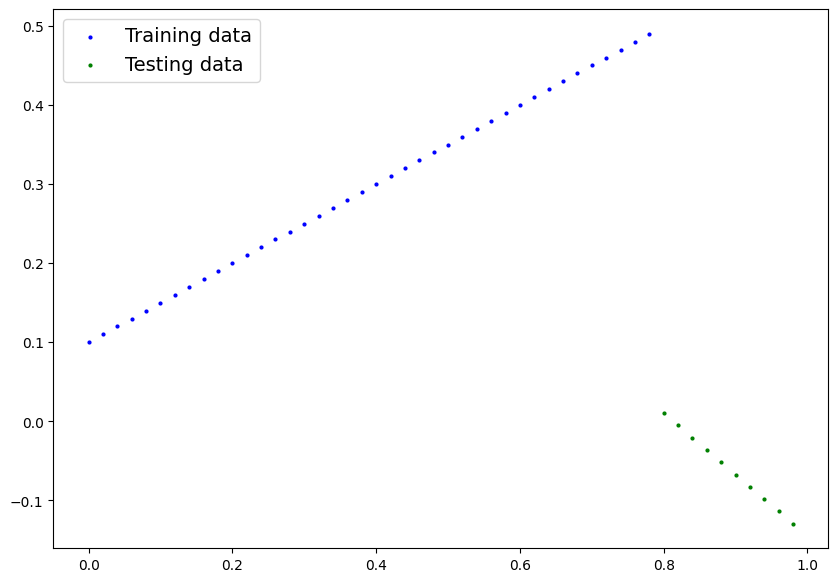

In [53]:
plot_predictions(X_train,y_train,X_test,y_preds)

## Train the model

### defining loss function and optimizer

In [54]:
loss_criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(params=linear_model.parameters(),lr=.01)

In [56]:
epoch_size = 500

for epoch in range(epoch_size):
    linear_model.train() # set model to training mode

    y_pred = linear_model(X_train)

    loss = loss_criterion(y_pred,y_train)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    linear_model.eval()

    with torch.inference_mode():
        test_pred = linear_model(X_test)

        test_loss = loss_criterion(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")
        


Epoch: 0 | Train loss: 0.08801450580358505 | Test loss: 0.3721082806587219
Epoch: 100 | Train loss: 0.010180527344346046 | Test loss: 0.04657605290412903
Epoch: 200 | Train loss: 0.0003557074232958257 | Test loss: 0.0016056703170761466
Epoch: 300 | Train loss: 3.0104952202236746e-06 | Test loss: 1.3387287253863178e-05
Epoch: 400 | Train loss: 4.905654549247629e-09 | Test loss: 2.1414733097913086e-08


In [57]:
linear_model.state_dict() # Already trained weight and bias

OrderedDict([('linear_layer.weight', tensor([[0.5000]])),
             ('linear_layer.bias', tensor([0.1000]))])

In [58]:
# Turn model into evaluation mode
linear_model.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = linear_model(X_test)
y_preds

tensor([[0.5000],
        [0.5100],
        [0.5200],
        [0.5300],
        [0.5400],
        [0.5500],
        [0.5600],
        [0.5700],
        [0.5800],
        [0.5900]])

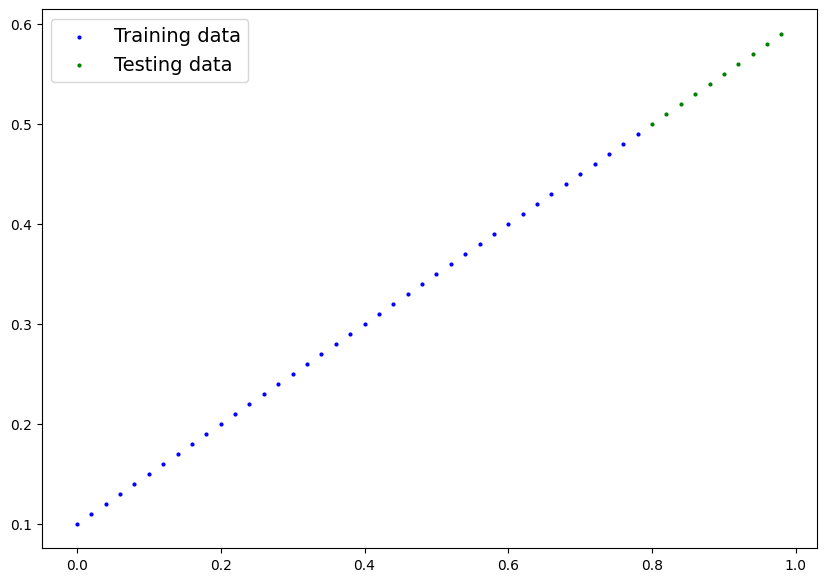

In [59]:
plot_predictions(X_train,y_train,X_test,y_preds)

As can be seen now the model are working properly as expected

## Saving the model

In [64]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)


MODEL_NAME = 'simple_linear_regression.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME


print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=linear_model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)


Saving model to: models/simple_linear_regression.pth
